## Problem 3: Google Playstore Apps Dataset (63 points)
> Given an Excel data file as represented by the sample file GooglePlaystore.xlsx (10K records), load it into a Pandas DataFrame (use the Pandas read_excel method), and perform the following tasks on it.

In [380]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# %pip install openpyxl
import openpyxl

In [381]:
df = pd.read_excel('./GooglePlaystore.xlsx')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08 00:00:00,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,2018-07-06 00:00:00,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,2017-01-20 00:00:00,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,2015-01-19 00:00:00,Varies with device,Varies with device


In [382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


---

### Preprocessing (28 pts)

---
1. [3 pts] Often there are outliers which do not match the overall data type. There is one record in this data where the "Reviews" has value "3.0M" which does not match the rest of the data. Remove that record.

In [383]:
# find the 3.0M in Reviews
outlier_row = df[df['Reviews'] == '3.0M']

# outlier_row
df = df.drop(outlier_row.index)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


2. [4 pts] Remove rows where any of the columns has the value "Varies with device".


In [384]:
varies_with_device = df.isin(['Varies with device'])

rows_with_varies_with_device = varies_with_device.any(axis=1)
print(df[rows_with_varies_with_device].head())

print(rows_with_varies_with_device.sum())

df = df[~rows_with_varies_with_device]

# Check if there are any rows left in df that contain 'Varies with device'
remaining_rows_with_varies_with_device = df.isin(['Varies with device']).any(axis=1)
print(remaining_rows_with_varies_with_device.sum())

                              App           Category  Rating Reviews  \
3           Sketch - Draw & Paint     ART_AND_DESIGN     4.5  215644   
37             Floor Plan Creator     ART_AND_DESIGN     4.1   36639   
42     Textgram - write on photos     ART_AND_DESIGN     4.4  295221   
52  Used Cars and Trucks for Sale  AUTO_AND_VEHICLES     4.6   17057   
67             Ulysse Speedometer  AUTO_AND_VEHICLES     4.3   40211   

                  Size     Installs  Type Price Content Rating  \
3                  25M  50,000,000+  Free     0           Teen   
37  Varies with device   5,000,000+  Free     0       Everyone   
42  Varies with device  10,000,000+  Free     0       Everyone   
52  Varies with device   1,000,000+  Free     0       Everyone   
67  Varies with device   5,000,000+  Free     0       Everyone   

             Genres         Last Updated         Current Ver  \
3      Art & Design  2018-06-08 00:00:00  Varies with device   
37     Art & Design  2018-07-14 00:00:00  

3. [5 pts] The values in the Android version column should be floats. Strip the trailing non-numeric characters from all values (ie. the words " and up"), so the result is a number. If there are multiple decimal places (eg. "x.y.z"), keep only the first two parts (eg "x.y"). For example, the value "4.1 and up" should be changed to "4.1". The value "4.5.6 and up" should be changed to "4.5". The value "5.6.7" should be changed to "5.6".
   
   If there is a range (eg. 5.0 - 8.0), only consider the first number. For example, the value "5.0 - 8.0" should be changed to "5.0". The value "4.0.3 - 7.1.1" should be changed to "4.0".

In [385]:
df['Android Ver'] = df['Android Ver'].str.extract(r'(\d+\.\d+)').astype(float)

df['Android Ver'].dtype

dtype('float64')

4. [5 pts] The "Installs" column must have integer values. For values that have commas, remove the commas. For values that have a '+' at the end, remove the '+'. Keep only those rows that have an integer value after these edits.

In [386]:
df['Installs'] = df['Installs'].str.replace('+', '', regex=False)
df['Installs'] = df['Installs'].str.replace(',', '', regex=False)

df['Installs'] = df['Installs'].astype(int)

df['Installs']

0          10000
1         500000
2        5000000
4         100000
5          50000
          ...   
10834        500
10835         10
10836       5000
10837        100
10838       1000
Name: Installs, Length: 9059, dtype: int64

5. [5 pts] For missing rating values, if the number of reviews is less than 100 and installations is less than 50000, remove the row. Else, fill the missing value with the average value (rounded to 2 decimal places) for the Category of that row.

In [387]:
missing_rating = df['Rating'].isna()

drop_indices = df[missing_rating & ((df['Reviews'] < 100) & (df['Installs'] < 50000))].index

df = df.drop(drop_indices)

df['Rating'] = df.groupby('Category')['Rating'].transform(lambda x: x.fillna(round(x.mean(), 2)))

6. [6 pts] Preprocess the Size column to convert the "M" (millions) and "K" (thousands) values into integers. For instance, 8.7M should be converted to 8700000 and 2.4K should be converted to 2400.

In [388]:
df['Size'] = df['Size'].replace({'M': '*1e6', 'k': '*1e3'}, regex=True).map(pd.eval).astype(int)

df['Size']

0        19000000
1        14000000
2         8700000
4         2800000
5         5600000
           ...   
10832      582000
10833      619000
10834     2600000
10836    53000000
10837     3600000
Name: Size, Length: 7685, dtype: int64

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7685 entries, 0 to 10837
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7685 non-null   object 
 1   Category        7685 non-null   object 
 2   Rating          7685 non-null   float64
 3   Reviews         7685 non-null   object 
 4   Size            7685 non-null   int64  
 5   Installs        7685 non-null   int64  
 6   Type            7685 non-null   object 
 7   Price           7685 non-null   object 
 8   Content Rating  7685 non-null   object 
 9   Genres          7685 non-null   object 
 10  Last Updated    7685 non-null   object 
 11  Current Ver     7681 non-null   object 
 12  Android Ver     7683 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 840.5+ KB


---

### Analysis (19 pts)
---

1. [4 pts] Describe (use DataFrame describe method) the category wise rating statistics. In other words, for each category, describe the statistics (count, mean, etc.) for ratings in that category.

In [390]:
category_wise_rating = df.groupby('Category')['Rating'].describe()
print(category_wise_rating)

                      count      mean       std  min    25%   50%    75%  max
Category                                                                     
ART_AND_DESIGN         59.0  4.358644  0.365322  3.2  4.100  4.40  4.700  5.0
AUTO_AND_VEHICLES      62.0  4.146774  0.569935  2.1  3.900  4.25  4.500  4.9
BEAUTY                 40.0  4.291750  0.356175  3.1  4.075  4.30  4.525  4.9
BOOKS_AND_REFERENCE   147.0  4.320136  0.453084  2.7  4.100  4.40  4.600  5.0
BUSINESS              246.0  4.119187  0.662586  1.0  3.825  4.30  4.500  5.0
COMICS                 49.0  4.154082  0.550363  2.8  3.800  4.40  4.600  5.0
COMMUNICATION         210.0  4.100952  0.502624  1.0  3.900  4.20  4.400  5.0
DATING                174.0  3.957816  0.664204  1.0  3.600  4.10  4.400  5.0
EDUCATION             110.0  4.392636  0.254395  3.5  4.300  4.40  4.600  4.9
ENTERTAINMENT          86.0  4.145349  0.291308  3.0  4.000  4.20  4.300  4.7
EVENTS                 36.0  4.474167  0.340037  3.7  4.300  4.5

2. [11 pts] Extract all "Free" apps from the master data frame. Then write a function that, given a numeric column e.g 'Rating'), will create and return a dataframe for the top 3 free applications in each category based on that column. Call the function on each of these columns:
   
    a. Rating (gives top 3 most highly rated applications in each category)  
    b. Installs (gives top 3 most installed applications in each category)  
    c. Reviews (gives top 3 most reviewed applications in each category)  

    **You don't need to do anything explicit to break ties.**

    Each of the returned dataframes have Category and App for the first two columns, and one of Rating (for a.), Installs (for b.), and Reviews (for c.) as the third column, as for instance:

In [391]:
filtered_df = df[df['Type'] == 'Free']
rating = filtered_df.sort_values(by=['Rating'], ascending=False)
rating_df = rating[['Category', 'App', 'Rating']][:3]
print(rating_df)
install = filtered_df.sort_values(by=['Installs'], ascending=False)
install_df = install[['Category', 'App', 'Installs']][:3]
print(install_df)
review = filtered_df.sort_values(by=['Reviews'], ascending=False)
review_df = review[['Category', 'App', 'Reviews']][:3]
print(review_df)

        Category                                App  Rating
10837     FAMILY   Fr. Mike Schmitz Audio Teachings     5.0
8104   LIFESTYLE           Cy-Fair Christian Church     5.0
8275      FAMILY  DC N COMPANY ENTERTAINMENT RADIO!     5.0
                Category             App    Installs
1872                GAME  Subway Surfers  1000000000
3736  NEWS_AND_MAGAZINES     Google News  1000000000
1917                GAME  Subway Surfers  1000000000
     Category             App   Reviews
1879     GAME  Clash of Clans  44893888
1704     GAME  Clash of Clans  44891723
1670     GAME  Clash of Clans  44891723


3. [4 pts] Find the average, maximum and minimum price of the paid applications.

In [392]:
filtered_df = df[df['Type'] == 'Paid']
print(filtered_df['Price'].mean())
print(filtered_df['Price'].max())
print(filtered_df['Price'].min())

15.139163763066062
400
0.99


In [393]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000,50000,Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10832,FR Tides,WEATHER,3.8,1195,582000,100000,Free,0,Everyone,Weather,2014-02-16 00:00:00,6,2.1
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619000,1000,Free,0,Everyone,Books & Reference,2014-03-23 00:00:00,0.8,2.2
10834,FR Calculator,FAMILY,4.0,7,2600000,500,Free,0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000,5000,Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1


---

### Visualization (16 pts)
---

[9 pts] In the genre column, break the string of genres into a list. For example, ‘Art & Design; Creativity’ should be [‘Art & Design’, Creativity’].
Count the number of applications per genre and display it using a pie chart.
Hint: Read about DataFrame.explode()


In [394]:
df['Genres']

0                     Art & Design
1        Art & Design;Pretend Play
2                     Art & Design
4          Art & Design;Creativity
5                     Art & Design
                   ...            
10832                      Weather
10833            Books & Reference
10834                    Education
10836                    Education
10837                    Education
Name: Genres, Length: 7685, dtype: object

<Axes: ylabel='Genres'>

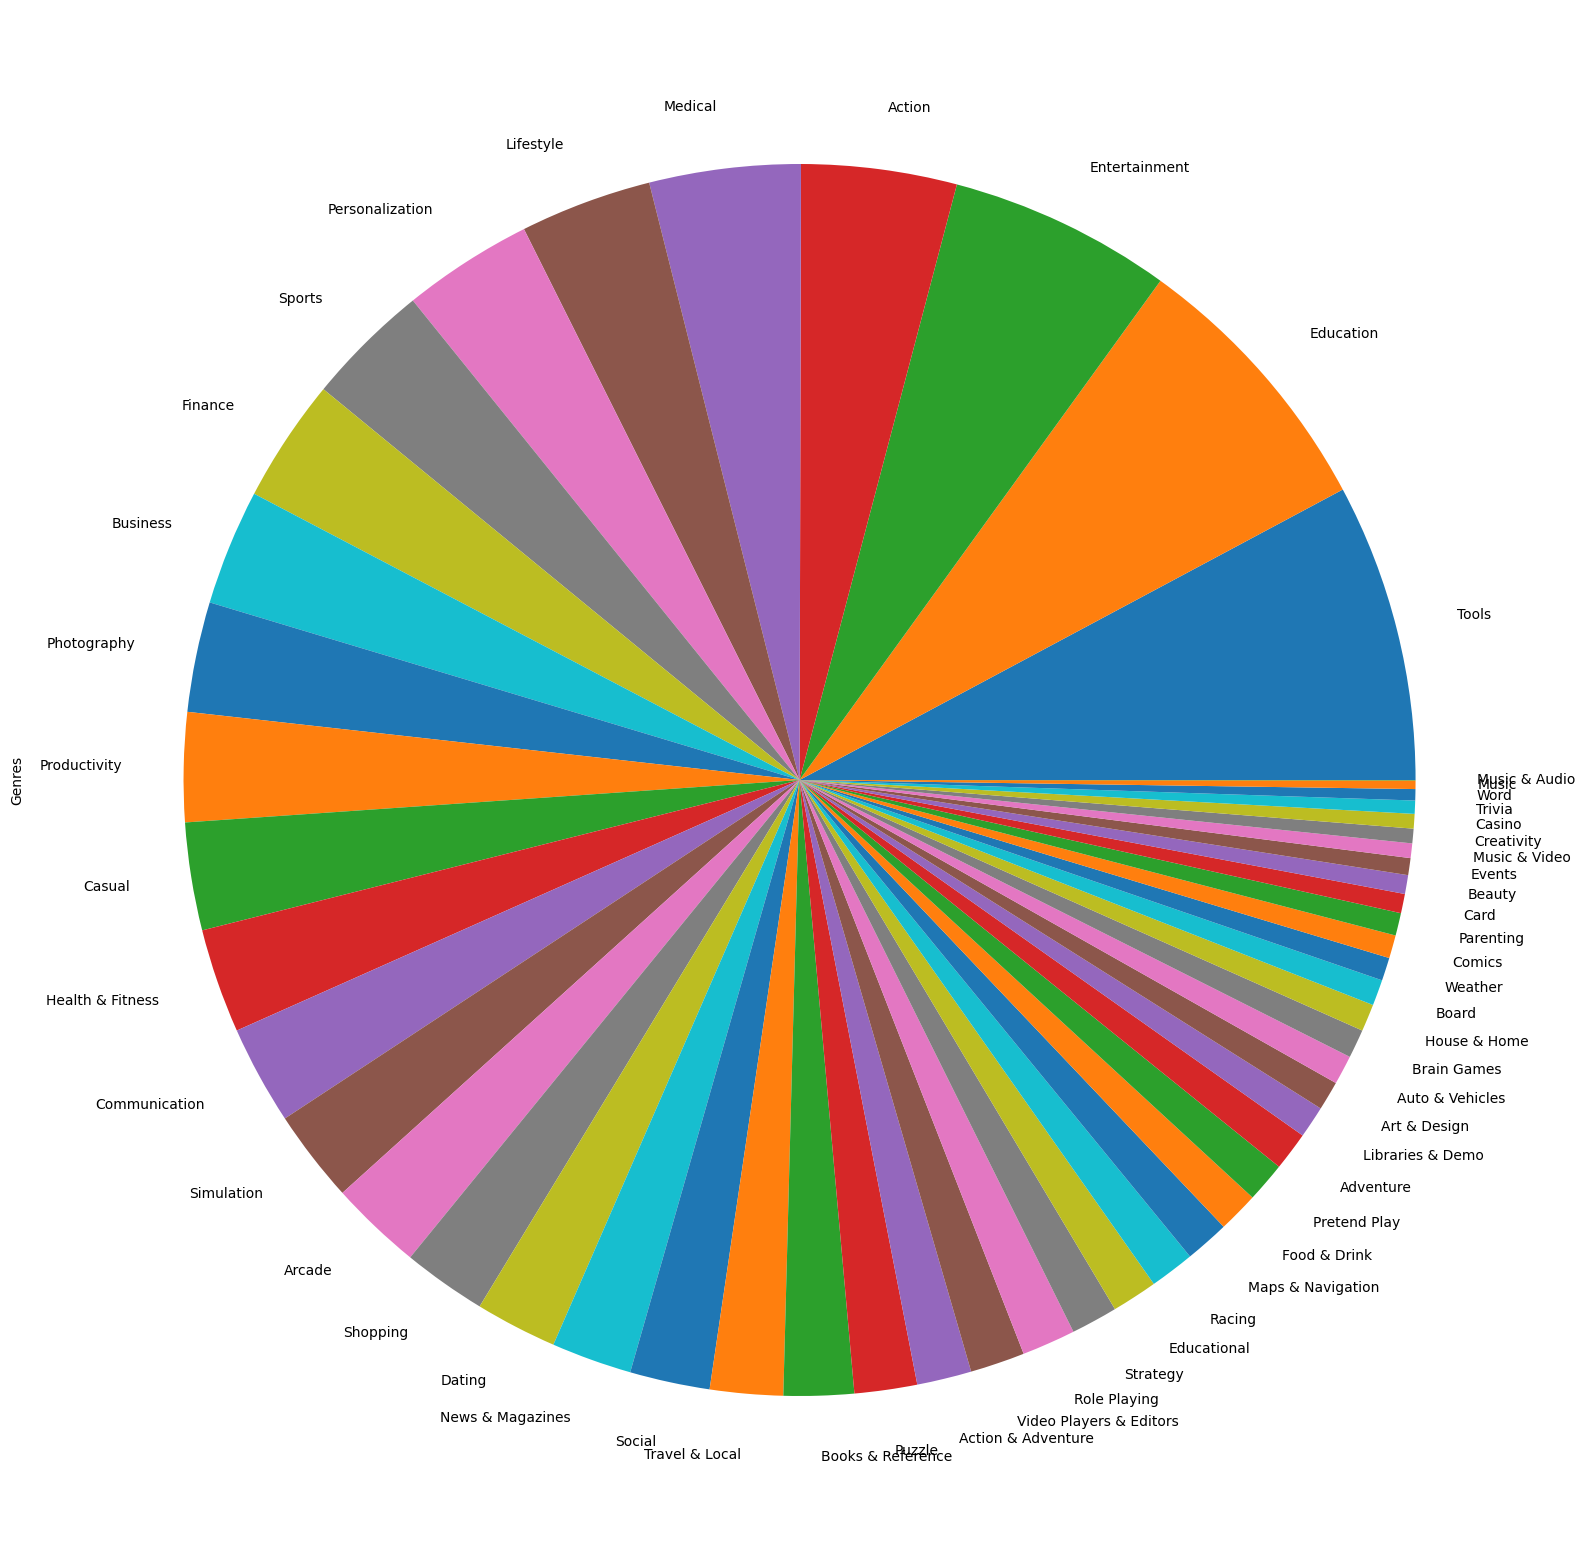

In [395]:
df['Genres'] = df['Genres'].str.split(';')

df_genres = df.explode('Genres')

genre_counts = df_genres['Genres'].value_counts()

genre_counts.plot(kind='pie', figsize=(20, 20))

[7 pts] Display a box plot of ratings for "Business" and "Education" categories. The boxplots should be in the same plot.

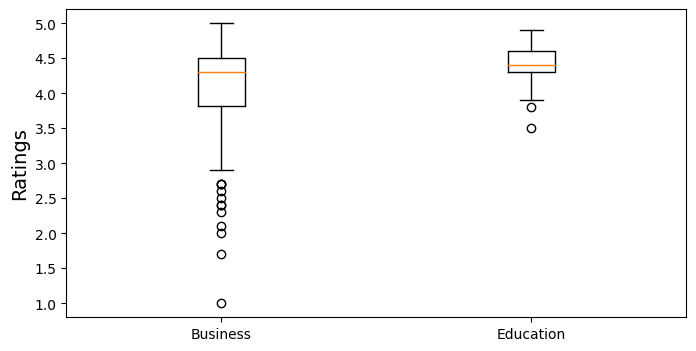

In [396]:
business = df[df['Category'] == 'BUSINESS']
education = df[df['Category'] == 'EDUCATION']
plt.figure(figsize=(8, 4))
plt.boxplot([business['Rating'], education['Rating']],labels=('Business','Education'))
plt.ylabel('Ratings', fontsize=14)
plt.show()